# Import Essential Libraries

In [2]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Loading the Data

In [5]:
df=pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.drop('CustomerID',axis=1,inplace=True)

# EDA (Exploratory Data Analysis)

<Axes: >

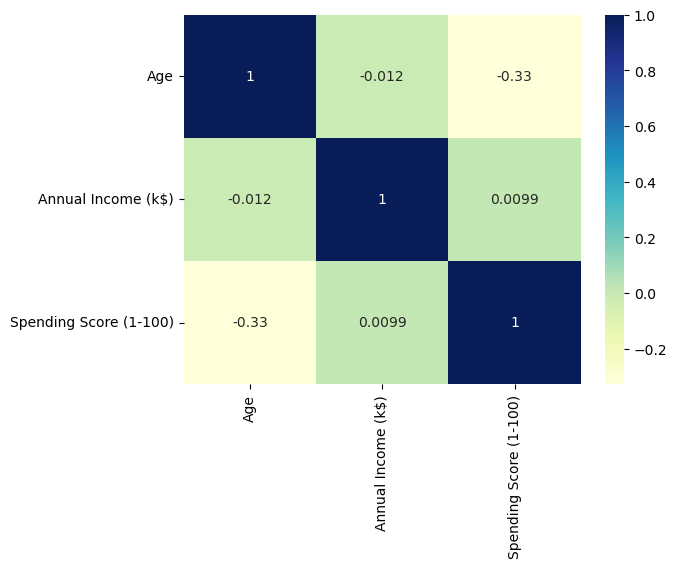

In [11]:
cont_col = list(df.describe())
cont_data = df.loc[:, cont_col]
sns.heatmap(cont_data.corr(), cmap="YlGnBu", annot=True)

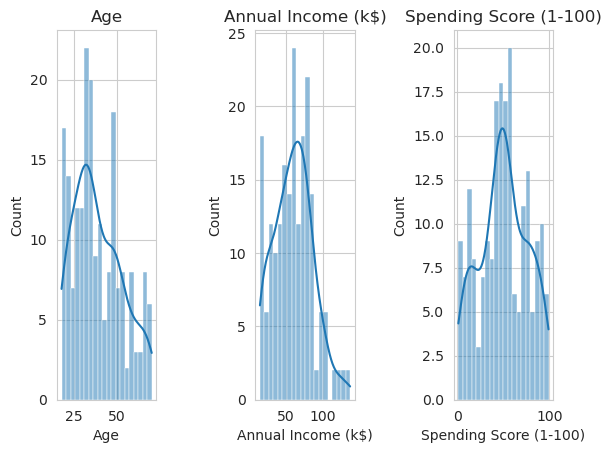

In [64]:
n = 0
for c in cont_col:
    n = n+1
    plt.subplot(1,len(cont_col),n)
    plt.subplots_adjust(hspace=0.5,wspace=1)
    sns.histplot(df[c],bins=20,kde=True)
    plt.title(c)
plt.show()

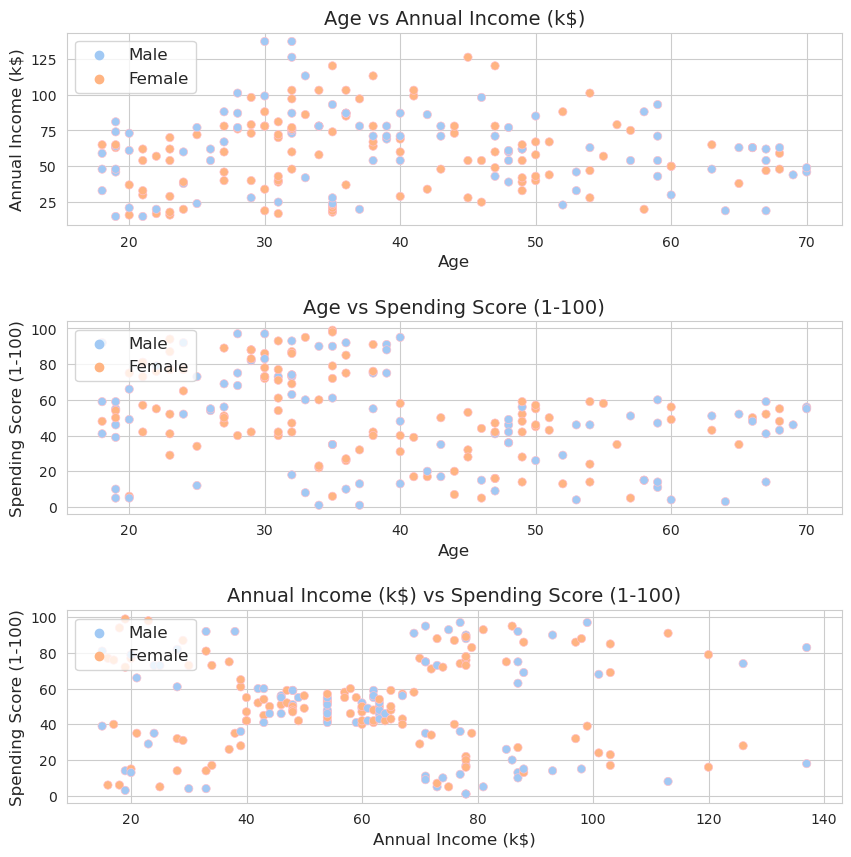

In [63]:
import seaborn as sns

# Create the subplots
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

# Loop over the columns and create scatterplots
a = 0
for i in range(len(cont_col)):
    for j in range(len(cont_col)):
        if i != j and j > i:
            # Increment the subplot index
            a = a + 1
            
            # Create the scatterplot
            sns.scatterplot(x=cont_col[i], y=cont_col[j], data=df, hue='Gender', palette='pastel', edgecolor='pink', ax=axs[a-1])
            
            # Set the title and legend
            title = cont_col[i] + ' vs ' + cont_col[j]
            axs[a-1].set_title(title, fontsize=14)
            axs[a-1].legend(loc='upper left', fontsize=12)
            
            # Set the axis labels
            axs[a-1].set_xlabel(cont_col[i], fontsize=12)
            axs[a-1].set_ylabel(cont_col[j], fontsize=12)
            
            # Set the tick label font size
            axs[a-1].tick_params(labelsize=10)

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()

In [21]:
import plotly.express as px

px.scatter(df, x = "Age", y = "Spending Score (1-100)", color = "Annual Income (k$)", template = "plotly_dark", opacity = 1)

In [24]:
fig = px.histogram(df, x = "Age", y = "Spending Score (1-100)", marginal = "violin", color = "Gender", template = "plotly_dark",
                   text_auto = True, width = None, height = None, nbins = 100, hover_data  = df.columns)
fig.show()

In [25]:
fig = px.histogram(df, x = "Age", y = "Annual Income (k$)", marginal = "violin", color = "Gender", template = "plotly_dark",
                   text_auto = True, width = None, height = None, nbins = 100, hover_data  = df.columns)
fig.show()

In [28]:
fig = px.density_heatmap(df, x = "Age", y = "Annual Income (k$)", z = "Spending Score (1-100)", color_continuous_scale = "electric", text_auto = True)
fig.show()

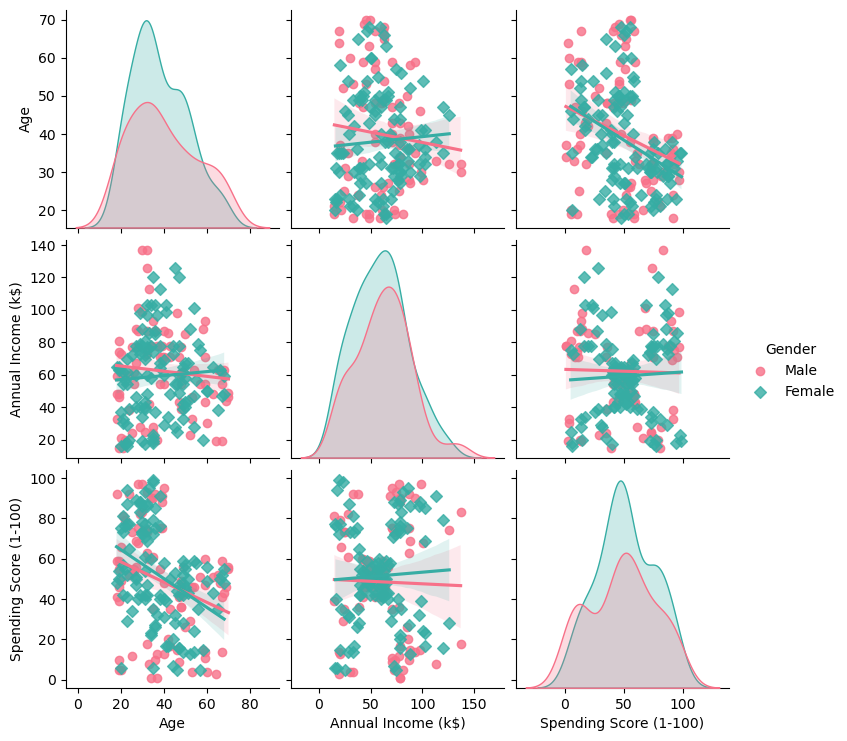

In [29]:
sns.pairplot(df, vars=["Age", "Annual Income (k$)", "Spending Score (1-100)"],  kind ="reg", hue = "Gender", palette="husl", markers = ['o','D'])

# Forming the Clusters

In [51]:
X= df.iloc[:, [2,3]].values

In [35]:
!pip install faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 51.8 MB/s eta 0:00:0000:0100:01


In [52]:
import faiss

# Define the number of clusters
k = 5

# Define the number of iterations
niter = 20

# Define the dimensionality of the vectors
d = X.shape[1]

# Initialize the kMeans object
kmeans = faiss.Kmeans(d, k, niter=niter)

# Train the kMeans object on the data
kmeans.train(X.astype('float32'))

# Get the cluster assignments for each data point
cluster_assignments = kmeans.index.search(X.astype('float32'), 1)[1].flatten()

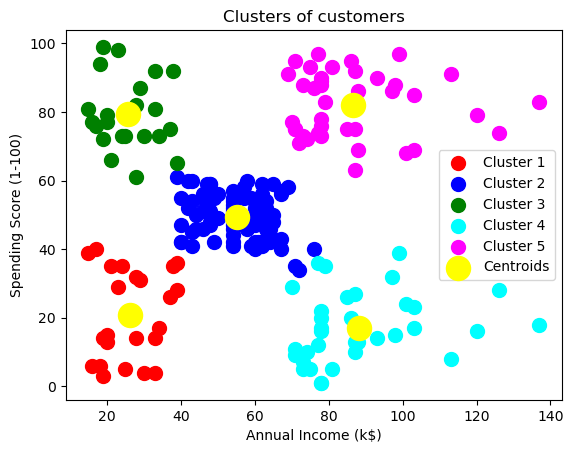

In [54]:
import matplotlib.pyplot as plt

# Define the colors for each cluster
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

# Plot each data point with its corresponding cluster color
for i in range(k):
    plt.scatter(X[cluster_assignments == i, 0], X[cluster_assignments == i, 1], s = 100, c = colors[i], label = f'Cluster {i+1}')

# Plot the centroids
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s = 300, c = 'yellow', label = 'Centroids')

# Add title and axis labels
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Add legend
plt.legend()

# Show the plot
plt.show()

# Model Interpretation 

- Cluster 1 (<span style="color:red">Red Color</span>) -> Earning less, spending less
- Cluster 2 (<span style="color:blue">Blue Color</span>) -> Average in terms of earning and spending
- Cluster 3 (<span style="color:green">Green Color</span>) -> Earning less but spending more
- Cluster 4 (<span style="color:cyan">Cyan Color</span>) -> Earning high but spending less
- Cluster 5 (<span style="color:magenta">Magenta Color</span>) -> Earning high and also spending high [TARGET SET]

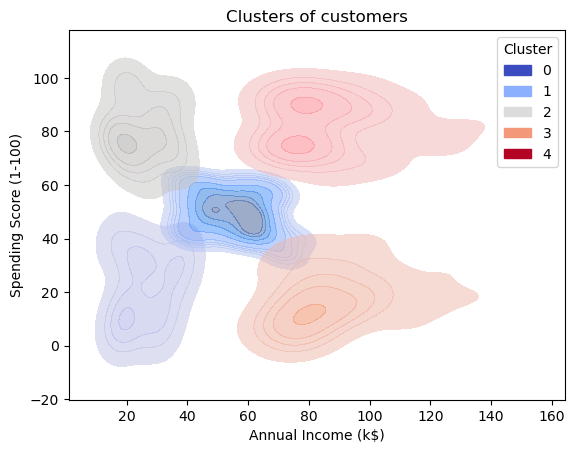

In [59]:
import seaborn as sns

# Create a dataframe with the data and cluster assignments
df_clustered = pd.DataFrame({'Annual Income (k$)': X[:, 0], 'Spending Score (1-100)': X[:, 1], 'Cluster': cluster_assignments})

# Create a heatmap
sns.kdeplot(data=df_clustered, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', fill=True, palette='coolwarm', alpha=.5)

# Add title and axis labels
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Show the plot
plt.show()